In this notebook, I will apply Gradient-Descent with momentum algorithms to linear regression problem.  

## Importing required libraries:

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
np.random.seed(44)

## Visualization functions:

### Visualizing the cost function:

Plot the cost function of Linear regression, the parameters updates and the countour plot.

In [166]:
def plot_cost(ax1, ax2, h_start, h_end, v_start, v_end, x_points, y_points, thetas_hist, costs, optimal_theta,
                   algorithm_name, parameters_names, stochastic=False):
    n = 50
    t0 = np.linspace(h_start, h_end, n, endpoint=True)
    t1 = np.linspace(v_start, v_end, n, endpoint=True)
    X, Y = np.meshgrid(t0, t1)
    Z = np.zeros((n, n))

    h = lambda theta_0, theta_1, x: theta_0 * x[:, 0] + theta_1 * x[:, 1]
    J = lambda theta_0, theta_1, x, y: (1/(2*x.shape[0])) * (h(theta_0, theta_1, x).reshape(-1, 1) - y).T \
        @ (h(theta_0, theta_1, x).reshape(-1, 1) - y)

    for i in range(n):
        for j in range(n):
            Z[i, j] = J(X[i, j], Y[i, j], x_points, y_points)
    
    if stochastic:
        costs = []
        for i in range(len(thetas_hist)):
            costs.append((J(thetas_hist[i, 0], thetas_hist[i, 1], x_points, y_points)).item())

    ax1.plot_surface(X, Y, Z, alpha=0.5)
    ax1.plot(thetas_hist[:, 0], thetas_hist[:, 1], costs, '-o', alpha=1)
    ax1.scatter(thetas_hist[-1][0], thetas_hist[-1][1], 
                J(thetas_hist[-1][0], thetas_hist[-1][1], x_points, y_points), c='blue', label=algorithm_name+' theta')
    ax1.scatter(optimal_theta[0], optimal_theta[1], J(optimal_theta[0], optimal_theta[1], x_points, y_points), c='red', label="Optimal theta")
    ax1.set_xlabel(parameters_names[0])
    ax1.set_ylabel(parameters_names[1])
    ax1.set_zlabel('J')

    ax2.contour(X, Y, Z, levels=20, zorder=0)
    ax2.plot(thetas_hist[:, 0], thetas_hist[:, 1], '-o', c='orange', zorder=0)
    ax2.scatter(thetas_hist[-1][0], thetas_hist[-1][1], c='blue', label=algorithm_name+' theta', zorder=2)
    ax2.scatter(optimal_theta[0, 0], optimal_theta[1, 0], c='red', label="Optimal theta", zorder=1)
    ax2.set_xlabel(parameters_names[0])
    ax2.set_ylabel(parameters_names[1])
    ax2.legend()

### Visualizing the cost function contours:

In [167]:
def plot_cost_contours(ax, h_start, h_end, v_start, v_end, x_points, y_points, thetas_hist, costs, optimal_theta,
                   algorithm_name, parameters_names, stochastic=False):
    n = 50
    t0 = np.linspace(h_start, h_end, n, endpoint=True)
    t1 = np.linspace(v_start, v_end, n, endpoint=True)
    X, Y = np.meshgrid(t0, t1)
    Z = np.zeros((n, n))

    h = lambda theta_0, theta_1, x: theta_0 * x[:, 0] + theta_1 * x[:, 1]
    J = lambda theta_0, theta_1, x, y: (1/(2*x.shape[0])) * (h(theta_0, theta_1, x).reshape(-1, 1) - y).T \
        @ (h(theta_0, theta_1, x).reshape(-1, 1) - y)

    for i in range(n):
        for j in range(n):
            Z[i, j] = J(X[i, j], Y[i, j], x_points, y_points)
    
    if stochastic:
        costs = []
        for i in range(len(thetas_hist)):
            costs.append((J(thetas_hist[i, 0], thetas_hist[i, 1], x_points, y_points)).item())

    ax.contour(X, Y, Z, levels=20, zorder=0)
    ax.plot(thetas_hist[:, 0], thetas_hist[:, 1], '-o', c='orange', zorder=0)
    ax.scatter(thetas_hist[-1][0], thetas_hist[-1][1], c='blue', label=algorithm_name+' theta', zorder=2)
    ax.scatter(optimal_theta[0, 0], optimal_theta[1, 0], c='red', label="Optimal theta", zorder=1)
    ax.set_xlabel(parameters_names[0])
    ax.set_ylabel(parameters_names[1])
    ax.legend()

### Visualizing the best fit surface:

Visualizes the best fit surface using 3 points on it.

In [168]:
def visualize_best_fit_surface(ax, h_start, h_end, v_start, v_end, x_points, y_points, theta):
    points = np.hstack([x_points[:3], x_points[:3] @ theta])

    p0, p1, p2 = points
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    x2, y2, z2 = p2

    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

    u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

    point  = np.array(p0)
    normal = np.array(u_cross_v)
    d = -point.dot(normal)
    xx, yy = np.meshgrid(range(h_start, h_end), range(v_start, v_end))
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

    # plot the surface
    ax.plot_surface(xx, yy, z, color='r', alpha=0.1)
    ax.scatter(x_points[:, 0], x_points[:, 1], y_points)
    ax.set_xlim3d(x1_points.min(), x1_points.max())
    ax.set_ylim3d(x2_points.min(), x2_points.max())
    ax.set_zlim3d(y_points.min(), y_points.max())
    plt.show();

## Data:

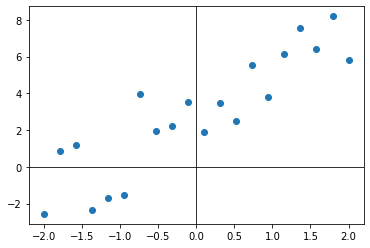

In [169]:
x_points = np.linspace(-2, 2, 20)
noise = np.random.normal(loc=0, scale=np.sqrt(2), size=20)
y_points = 3 + 2.25 * x_points + noise

x_points = x_points.reshape((-1, 1))
y_points = y_points.reshape((-1, 1))

fig = plt.figure()
plt.axhline(y=0, c='black', linewidth=0.8)
plt.axvline(x=0, c='black', linewidth=0.8)
plt.scatter(x_points.flatten(), y_points.flatten())
plt.show()

## Analytical Solution:

**Normal Equation**:
$\theta^* = (X^T X)^{-1} X^T y$

In [170]:
x_points_analytic = np.hstack((np.ones((20, 1)), x_points))
optimal_theta = (np.linalg.inv(x_points_analytic.T @ x_points_analytic)) @ x_points_analytic.T @ y_points
print("Optimal theta_1: ", optimal_theta[0, 0])
print("Optimal theta_2: ", optimal_theta[1, 0])

Optimal theta_1:  2.8387867499621593
Optimal theta_2:  2.2858324240755774


# `1)` Momentum-based Gradient Descent:

The idea is to add a momentum term to the update equation, this momentum is a weighted average over the previous history of gradients before this step.  
It gives higher weights to the most recent gradient vectors and lower weigths to the older ones.  
Older weights decay exponentially with a parameter called $\beta$.  
This momentum gives us more speed when we're moving in the same direction (gradients have the same sign), this make the algorithm go faster towards the minimun (our goal), but it then overshoots it due to this momentum and it continues in the same direction (away from the minimum) until the gradient starts to become bigger (in the opposite direction of the momentum) and overcome the momentum term and drive it back towards the minimum.  
The momentum will cause the algorithm to overshoot the minimum again (but with a smaller value this time) and these oscillations continue until the algorithm converges.  

This overshooting can save the algorithm from getting stuck at local minimums or saddle points as it will drive the algorithms away from them even if the gradient was zero.

$$Input: X$$
$$Parameters: \theta$$  
$$Hypothesis: h_{\theta}(X) = X \theta$$  
$$Cost function: J(\theta) = \frac{1}{2m}(h_\theta(x^{(i)}) - y^{(i)})^T (h_\theta(x^{(i)}) - y^{(i)})$$  
$$Gradient: \nabla_\theta J(\theta) = \frac{1}{m} X^T (h_\theta(x^{(i)}) - y^{(i)})$$
$$Goal: \theta^* = min_\theta  J(\theta) $$  
$$Update\space step: v_t = \beta v_{t-1} + \alpha \nabla_\theta J(\theta)$$  
$$ \theta_{t+1} =  \theta_{t} - v_t$$  

In [171]:
def BatchGradientDescentWithMomentum(X, y, fit_intercept=True, lr=0.001, beta=0.9, epochs=10):
    m, n = X.shape
    if fit_intercept:
        X = np.hstack([np.ones((m, 1)), X])
        n +=1
    thetas = np.zeros((n, 1))
    costs = []
    thetas_hist = []
    v = 0
    
    for i in range(epochs):
        thetas_hist.append(thetas)
        y_predicted = X @ thetas
        e = y_predicted - y
        cost = 1/(2*m) * e.T @ e
        costs.append(cost.item())
        grad = 1/m * X.T @ e
        v = beta * v + lr * grad
        thetas = thetas - v
        
    return thetas_hist, costs

momentum theta_1:  2.8387867499621593
momentum theta_2:  2.285832424075578


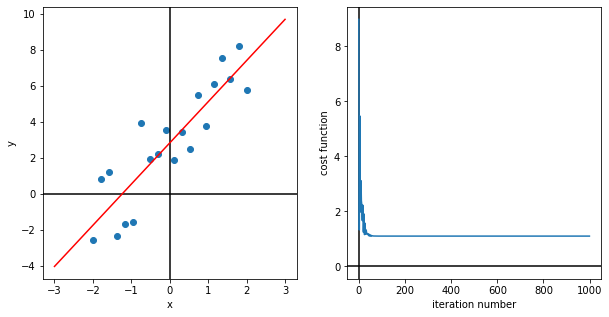

In [172]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, fit_intercept=True, lr=0.3, beta=0.9, epochs=1000)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
theta_momentum = thetas_hist[[-1]].T
theta_0 = theta_momentum[0]
theta_1 = theta_momentum[1]
print("momentum theta_1: ", theta_0.item())
print("momentum theta_2: ", theta_1.item())

h = lambda theta, x: np.hstack([np.ones((x.shape[0], 1)), x]) @ theta

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('x')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('y')
ax1.scatter(x_points, y_points)
ax1.plot(range(-3, 4), h(theta_momentum, np.arange(-3, 4).reshape((-1, 1))), c='red')

ax2 = fig.add_subplot(122)
ax2.axhline(y=0, c='black')
ax2.set_xlabel('iteration number')
ax2.axvline(x=0, c='black')
ax2.set_ylabel('cost function')
ax2.plot(range(len(costs)), costs)

plt.show()

#### Cost function Visualization:

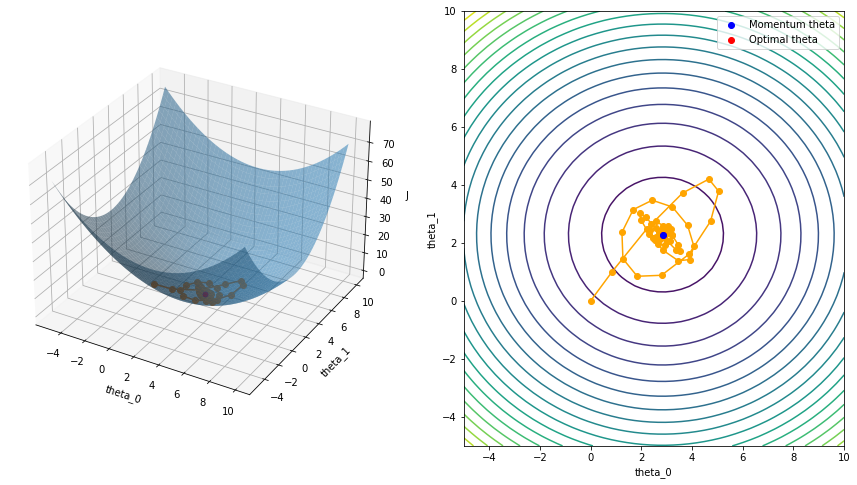

In [173]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
plot_cost(ax1, ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
          y_points, thetas_hist, costs, optimal_theta, 'Momentum', ['theta_0', 'theta_1'])

plt.show()

## Mini-batch Momentum-Based GD:

In [174]:
def MiniBatchGDMomentum(X, y, epochs=100, fit_intercept=True, lr=0.001, beta=0.9, batch_size=64, shuffle=True):
    m, n = X.shape
    if fit_intercept:
        X = np.hstack([np.ones((m, 1)), X])
        n += 1
        
    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
    
    n_batches = m // batch_size
    thetas = np.zeros((n, 1))
    v = 0
    thetas_hist = []
    costs = []

    for i in range(epochs):
        for b in range(n_batches):
            thetas_hist.append(thetas)
            X_batch = X[b * batch_size: (b+1) * batch_size, :]
            y_batch = y[b * batch_size: (b+1) * batch_size, :]
            y_batch_predicted = X_batch @ thetas
            e_batch = y_batch_predicted - y_batch
            cost = 1/(2*batch_size) * e_batch.T @ e_batch
            costs.append(cost.item())
            grad = 1/batch_size * X_batch.T @ e_batch
            v = beta * v + lr * grad
            thetas = thetas - v
            
    return thetas_hist, costs
            

momentum theta_0:  3.0334275187436575
momentum theta_1:  2.2286648673287193


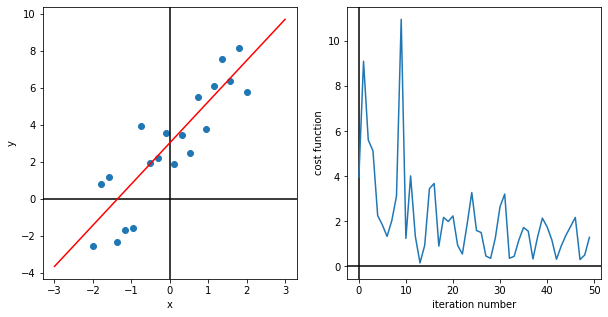

In [175]:
thetas_hist, costs = MiniBatchGDMomentum(x_points, y_points, fit_intercept=True, lr=0.1, beta=0.9, epochs=10, batch_size=4, shuffle=True)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
theta_momentum = thetas_hist[[-1]].T
theta_0 = theta_momentum[0]
theta_1 = theta_momentum[1]
print("momentum theta_0: ", theta_0.item())
print("momentum theta_1: ", theta_1.item())

h = lambda theta, x: np.hstack([np.ones((x.shape[0], 1)), x]) @ theta

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('x')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('y')
ax1.scatter(x_points, y_points)
ax1.plot(range(-3, 4), h(theta_momentum, np.arange(-3, 4).reshape((-1, 1))), c='red')

ax2 = fig.add_subplot(122)
ax2.axhline(y=0, c='black')
ax2.set_xlabel('iteration number')
ax2.axvline(x=0, c='black')
ax2.set_ylabel('cost function')
ax2.plot(range(len(costs)), costs)

plt.show()

#### Cost function Visualization:

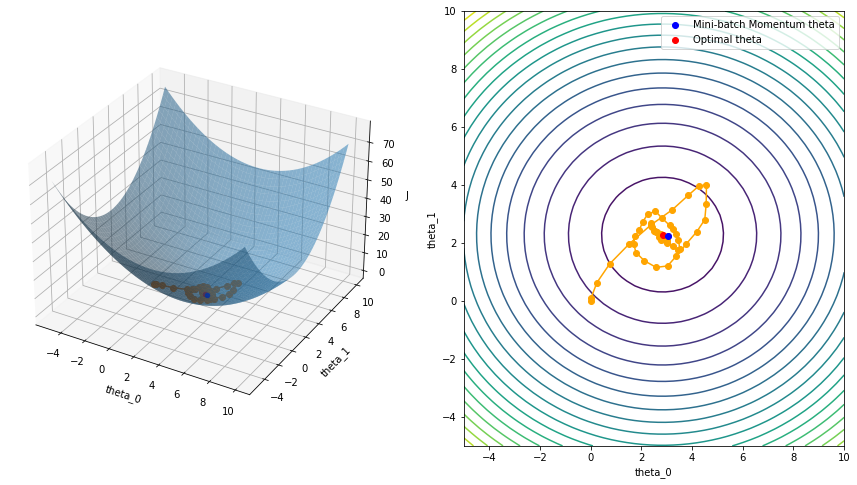

In [176]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
plot_cost(ax1, ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
           y_points, thetas_hist, costs, optimal_theta,
          'Mini-batch Momentum', ['theta_0', 'theta_1'], stochastic=True)
plt.show()

# `2)` Nesterov Accelerated Gradient (NAG):

NAG can be considered as an imporvement to the momentum-based gradient descent opitimizer.  
Its goal is to minimize the oscillations around the minima by performing a look ahead step before computing the gradient and therefore it might converge faster even if its usual update step is smaller than the Momentum-GD step.  
It breaks the update equation of the Momentum-GD $\theta_{t+1} = \theta_t - (\beta v_{t-1} + \alpha \nabla J_\theta(\theta))$ into two parts:  
$\beta v_{t-1}$ which is the part of the update step produced by the previous momentum (history).  
$\alpha \nabla J_\theta(\theta)$ which is the part of the update step produced by the gradient.  
And since we have no control over the previous momentum, we update the parameters by its update part and then we compute the gradient of the cost function and the temporary parameters value instead of using the gradient at the starting point.  
This makes NAG normal step a little smaller than the Momentum-GD step because the gradient gets smaller as we get closer to the minima, but on the other hand it makes it overshoot the minima by only a small value, which can make the algorithm converge faster.

$$Input: X$$
$$Parameters: \theta$$  
$$Hypothesis: h_{\theta}(X) = X \theta$$  
$$Cost function: J(\theta) = \frac{1}{2m}(h_\theta(x^{(i)}) - y^{(i)})^T (h_\theta(x^{(i)}) - y^{(i)})$$  
$$Gradient: \nabla_\theta J(\theta) = \frac{1}{m} X^T (h_\theta(x^{(i)}) - y^{(i)})$$
$$Goal: \theta^* = min_\theta  J(\theta) $$  
$$Update\space step: \theta_{temp} = \theta_t - \beta v_{t - 1}$$
$$\theta_{t+1} = \theta_{temp} - \alpha \nabla J_\theta(\theta_{temp})$$
$$v_t = \beta v_{t-1} + \alpha \nabla J_\theta(\theta_{temp})$$

In [177]:
def NAG(X, y, fit_intercept=True, lr=0.001, beta=0.9, epochs=10):
    m, n = X.shape
    if fit_intercept:
        X = np.hstack([np.ones((m, 1)), X])
        n += 1
    thetas = np.zeros((n, 1))
    costs = []
    thetas_hist = []
    v = 0
    
    for i in range(epochs):
        thetas_hist.append(thetas)
        cost = 1/(2*m) * (X @ thetas - y).T @ (X @ thetas - y)
        costs.append(cost.item())
        
        thetas_temp = thetas - beta * v
        y_predicted = X @ thetas_temp
        e = y_predicted - y
        
        grad = 1/m * X.T @ e
        thetas = thetas_temp - lr * grad
        v = beta * v + lr * grad
        
    return thetas_hist, costs

momentum theta_1:  2.83878674967773
momentum theta_2:  2.2858324240755814


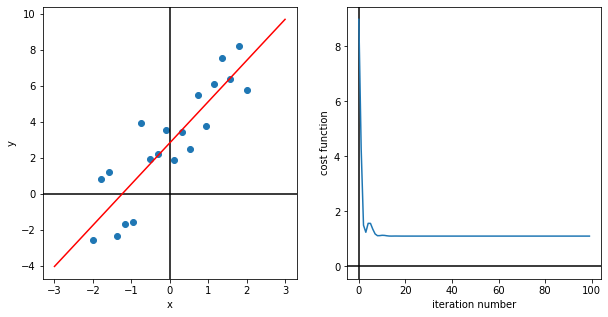

In [178]:
thetas_hist, costs = NAG(x_points, y_points, lr=0.3, beta=0.9, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
theta_momentum = thetas_hist[[-1]].T
theta_0 = theta_momentum[0]
theta_1 = theta_momentum[1]
print("momentum theta_1: ", theta_0.item())
print("momentum theta_2: ", theta_1.item())

h = lambda theta, x: np.hstack([np.ones((x.shape[0], 1)), x]) @ theta

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('x')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('y')
ax1.scatter(x_points, y_points)
ax1.plot(range(-3, 4), h(theta_momentum, np.arange(-3, 4).reshape((-1, 1))), c='red')

ax2 = fig.add_subplot(122)
ax2.axhline(y=0, c='black')
ax2.set_xlabel('iteration number')
ax2.axvline(x=0, c='black')
ax2.set_ylabel('cost function')
ax2.plot(range(len(costs)), costs)

plt.show()

#### Cost function Visualization:

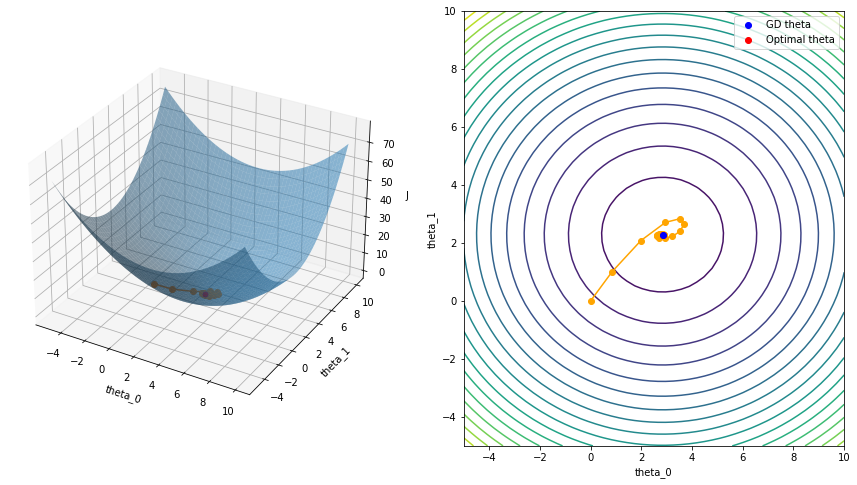

In [179]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
plot_cost(ax1, ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
          y_points, thetas_hist, costs, optimal_theta, 'GD', ['theta_0', 'theta_1'])

plt.legend()
plt.show()

## Mini-batch NAG:

In [180]:
def MiniBatchNAG(X, y, fit_intercept=True, epochs=100, lr=0.001, beta=0.9, batch_size=64, shuffle=True):
    m, n = X.shape
    if fit_intercept:
        X = np.hstack([np.ones((m, 1)), X])
        n += 1

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
    
    
    n_batches = m // batch_size
    thetas = np.zeros((n, 1))
    v = 0
    thetas_hist = []
    costs = []
    
    for i in range(epochs):
        for b in range(n_batches):
            thetas_hist.append(thetas)
            X_batch = X[b * batch_size: (b+1) * batch_size, :]
            y_batch = y[b * batch_size: (b+1) * batch_size, :]
            cost = 1/(2*batch_size) * (X_batch @ thetas - y_batch).T @ (X_batch @ thetas - y_batch)
            costs.append(cost.item())
            
            thetas_temp = thetas - beta * v
            y_batch_temp_predicted = X_batch @ thetas_temp
            e_temp_batch = y_batch_temp_predicted - y_batch
            grad = 1/batch_size * X_batch.T @ e_temp_batch
            thetas = thetas_temp - lr * grad
            v = beta * v + lr * grad
            
    return thetas_hist, costs
            

momentum theta_0:  2.886790602877345
momentum theta_1:  2.2324198121704604


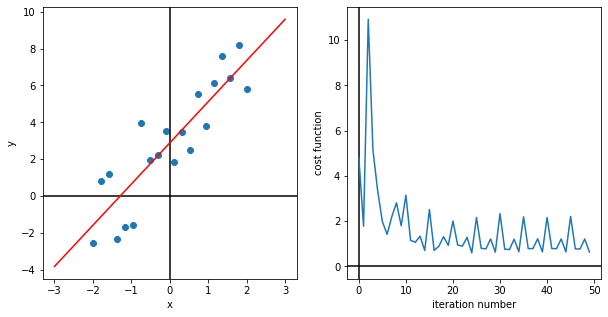

In [181]:
thetas_hist, costs = MiniBatchNAG(x_points, y_points, lr=0.1, beta=0.9, epochs=10, batch_size=4, shuffle=True)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
theta_momentum = thetas_hist[[-1]].T
theta_0 = theta_momentum[0]
theta_1 = theta_momentum[1]
print("momentum theta_0: ", theta_0.item())
print("momentum theta_1: ", theta_1.item())

h = lambda theta, x: np.hstack([np.ones((x.shape[0], 1)), x]) @ theta

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('x')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('y')
ax1.scatter(x_points, y_points)
ax1.plot(range(-3, 4), h(theta_momentum, np.arange(-3, 4).reshape((-1, 1))), c='red')

ax2 = fig.add_subplot(122)
ax2.axhline(y=0, c='black')
ax2.set_xlabel('iteration number')
ax2.axvline(x=0, c='black')
ax2.set_ylabel('cost function')
ax2.plot(range(len(costs)), costs)

plt.show()

#### Cost function Visualization:

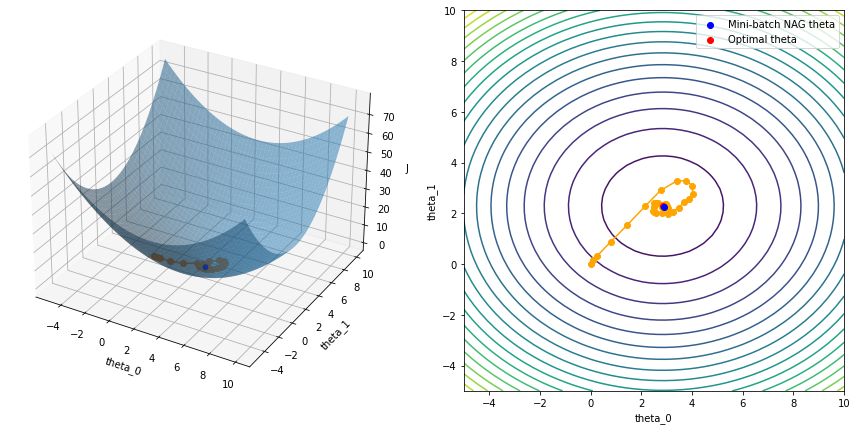

In [182]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
plot_cost(ax1, ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
           y_points, thetas_hist, costs, optimal_theta,
          'Mini-batch NAG', ['theta_0', 'theta_1'], stochastic=True)

plt.show()

## Hyperparameters:

### Momentum Parameter effect:

#### Very small momentum parameter:

The previous history (momentum) has only a small effect on the parameters update, so the update step gets only bigger by a small amount with time and there is almost no oscillations around the minima.

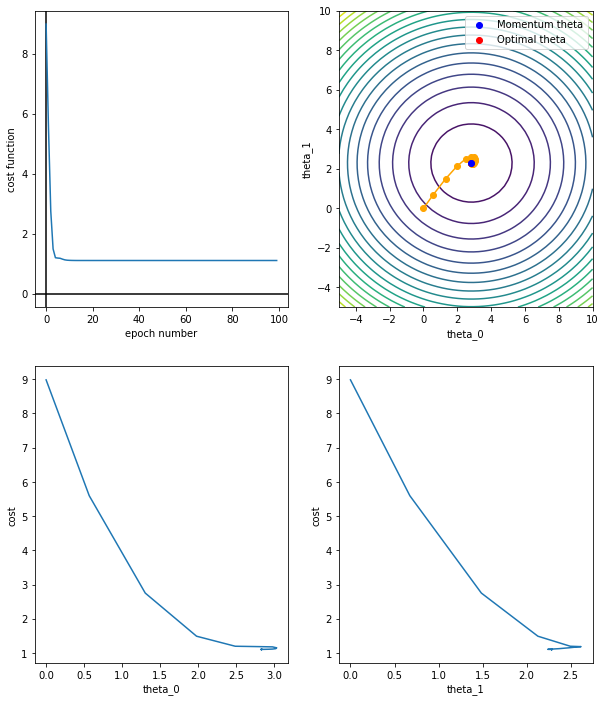

In [183]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, lr=0.2, beta=0.5, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))

fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(221)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('epoch number')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('cost function')
ax1.plot(range(len(costs)), costs)

ax2 = fig.add_subplot(222)
plot_cost_contours(ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
                   y_points, thetas_hist, costs, optimal_theta, "Momentum", ['theta_0', 'theta_1'])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('theta_0')
ax3.set_ylabel('cost')
ax3.plot(thetas_hist[:, 0], costs)


ax4 = fig.add_subplot(224)
ax4.set_xlabel('theta_1')
ax4.set_ylabel('cost')
ax4.plot(thetas_hist[:, 1], costs)
plt.show()

#### Normal momentum parameter:

The previous history (momentum) makes the algorithm update step bigger with time as long as it's moving in the same direction and that makes it overshoot the minimum and then go back in the opposite direction and then overshoot it again and so on.  
Although that might seem bad in a convex function, it can help the algorithm escape local minimums and saddle points in non-convex ones.

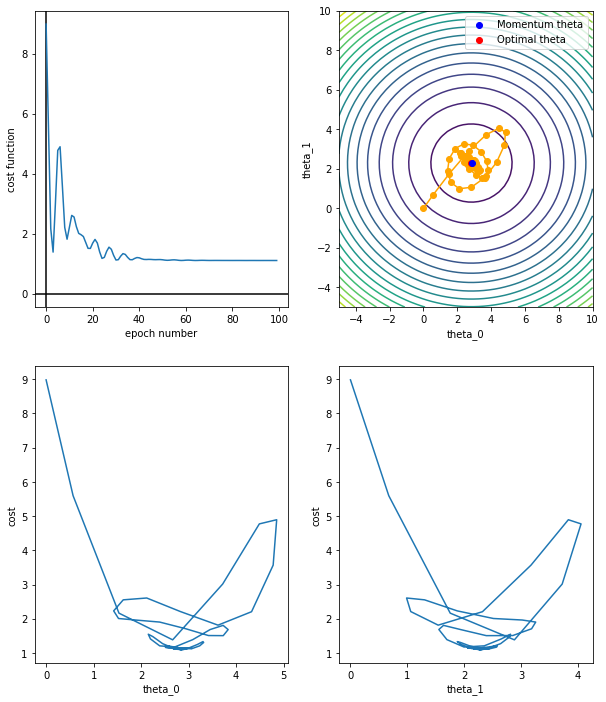

In [184]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, lr=0.2, beta=0.9, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))

fig = plt.figure(figsize=(10, 12))

ax1 = fig.add_subplot(221)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('epoch number')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('cost function')
ax1.plot(range(len(costs)), costs)

ax2 = fig.add_subplot(222)
plot_cost_contours(ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
                   y_points, thetas_hist, costs, optimal_theta, "Momentum", ['theta_0', 'theta_1'])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('theta_0')
ax3.set_ylabel('cost')
ax3.plot(thetas_hist[:, 0], costs)


ax4 = fig.add_subplot(224)
ax4.set_xlabel('theta_1')
ax4.set_ylabel('cost')
ax4.plot(thetas_hist[:, 1], costs)
plt.show()

#### Very large momentum parameter:

The previous history (momentum) has only a very large effect on the parameters update, so it makes the algorithm overshoot the minimum by a large value and go back and overshoot again by a large value and so on. This can make the algorithm never converge.

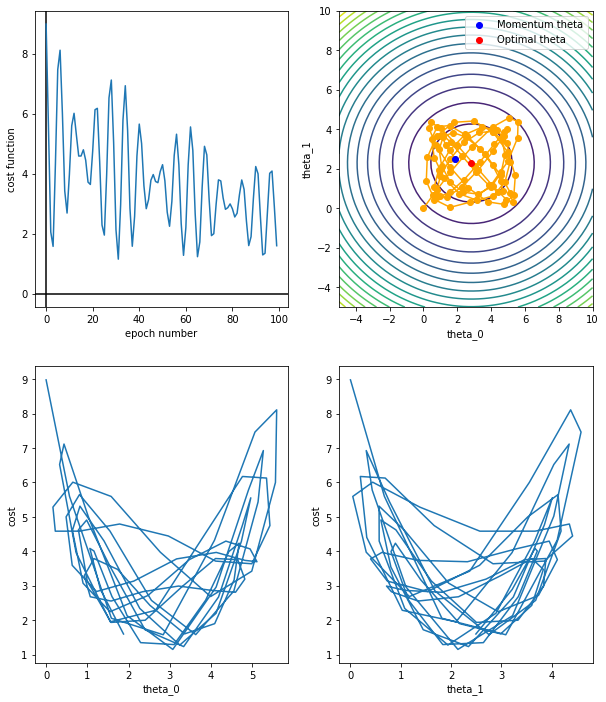

In [185]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, lr=0.2, beta=0.99, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))

fig = plt.figure(figsize=(10, 12))

ax1 = fig.add_subplot(221)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('epoch number')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('cost function')
ax1.plot(range(len(costs)), costs)

ax2 = fig.add_subplot(222)
plot_cost_contours(ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
                   y_points, thetas_hist, costs, optimal_theta, "Momentum", ['theta_0', 'theta_1'])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('theta_0')
ax3.set_ylabel('cost')
ax3.plot(thetas_hist[:, 0], costs)


ax4 = fig.add_subplot(224)
ax4.set_xlabel('theta_1')
ax4.set_ylabel('cost')
ax4.plot(thetas_hist[:, 1], costs)
plt.show()

### Momentum-based GD vs NAG:

Both algorithms depend on the previouos history of gradients (momentum) and use it to make their update step, but since NAG updates the parameters using the history update part first and then it calculates the gradient while Momentum-based GD calculates the gradient before making any updates, NAG will have less oscillations around the minimum and it might converge faster.

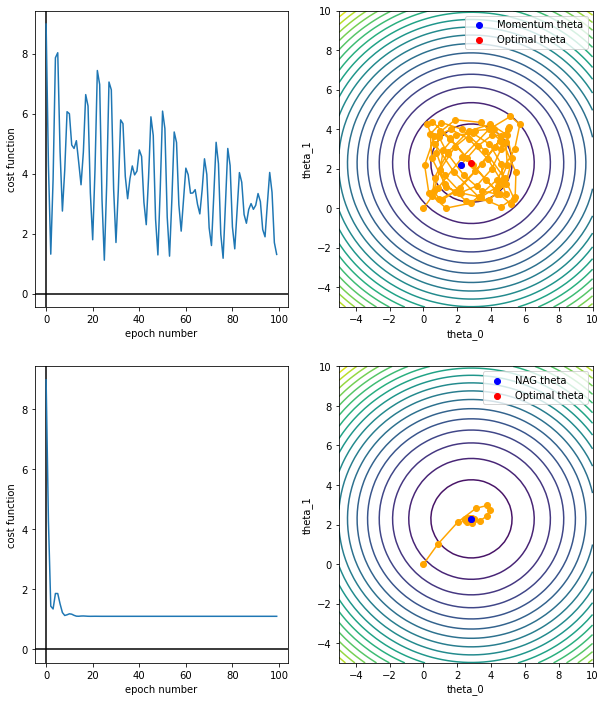

In [186]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, lr=0.3, beta=0.99, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))

fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(221)
ax1.axhline(y=0, c='black')
ax1.set_xlabel('epoch number')
ax1.axvline(x=0, c='black')
ax1.set_ylabel('cost function')
ax1.plot(range(len(costs)), costs)

ax2 = fig.add_subplot(222)
plot_cost_contours(ax2, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
                   y_points, thetas_hist, costs, optimal_theta, "Momentum", ['theta_0', 'theta_1'])

thetas_hist, costs = NAG(x_points, y_points, lr=0.3, beta=0.99, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
ax3 = fig.add_subplot(223)
ax3.axhline(y=0, c='black')
ax3.set_xlabel('epoch number')
ax3.axvline(x=0, c='black')
ax3.set_ylabel('cost function')
ax3.plot(range(len(costs)), costs)

ax4 = fig.add_subplot(224)
plot_cost_contours(ax4, -5, 10, -5, 10, np.hstack([np.ones((x_points.shape[0], 1)), x_points]),
                   y_points, thetas_hist, costs, optimal_theta, "NAG", ['theta_0', 'theta_1'])
plt.show()

### Feature Scaling

Momentum eliminates the need for feature scaling, because the momentum will sum the gradients components in opposite direction and the oscillations will become smaller with time.  
This make the algorithm converge faster than the usual Gradient Descent when the features have different values or ranges.

### Data points

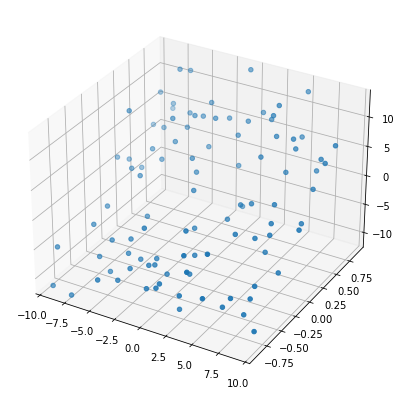

In [187]:
x1_points = np.linspace(-10, 10, 100)
x2_points = np.random.uniform(low=-1, high=1, size=(100,))
noise = np.random.normal(loc=0, scale=np.sqrt(9), size=100)
y_points = 0.1 * x1_points + 10 * x2_points + noise

x_points = np.hstack([x1_points.reshape(-1, 1), x2_points.reshape(-1, 1)])
y_points = y_points.reshape((-1, 1))


plt.figure(figsize = (10, 7))
plt3d = plt.axes(projection='3d')
plt3d.scatter(x_points[:, 0], x_points[:, 1], y_points)
plt3d.set_xlim3d(x1_points.min(), x1_points.max())
plt3d.set_ylim3d(x2_points.min(), x2_points.max())
plt3d.set_zlim3d(y_points.min(), y_points.max())
plt.show();

### Analytic solution:

Optimal theta 0:  0.13057752628540384
Optimal theta 1:  9.559440132035393


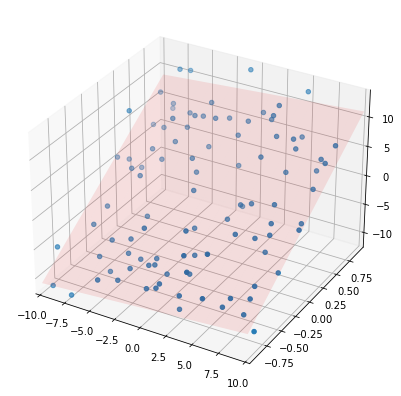

In [188]:
x_points_analytic = x_points.copy()
optimal_theta = (np.linalg.inv(x_points_analytic.T @ x_points_analytic)) @ x_points_analytic.T @ y_points
print("Optimal theta 0: ", optimal_theta[0, 0])
print("Optimal theta 1: ", optimal_theta[1, 0])

plt.figure(figsize = (10, 7))
ax = plt.axes(projection='3d')
visualize_best_fit_surface(ax, -10, 11, -1, 2, x_points, y_points, optimal_theta)
plt.show();

Momentum-based GD with a different starting point for better visulization.

In [189]:
def BatchGradientDescentWithMomentum(X, y, fit_intercept=True, lr=0.001, beta=0.9, epochs=10):
    m, n = X.shape
    if fit_intercept:
        X = np.hstack([np.ones((m, 1)), X])
        n +=1
    thetas = np.array([[5], [5]])
    costs = []
    thetas_hist = []
    v = 0
    
    for i in range(epochs):
        thetas_hist.append(thetas)
        y_predicted = X @ thetas
        e = y_predicted - y
        cost = 1/(2*m) * e.T @ e
        costs.append(cost.item())
        grad = 1/m * X.T @ e
        v = beta * v + lr * grad
        thetas = thetas - v
        
    return thetas_hist, costs

GD theta_0:  0.1306793734355718
GD theta_1:  9.559414897650827


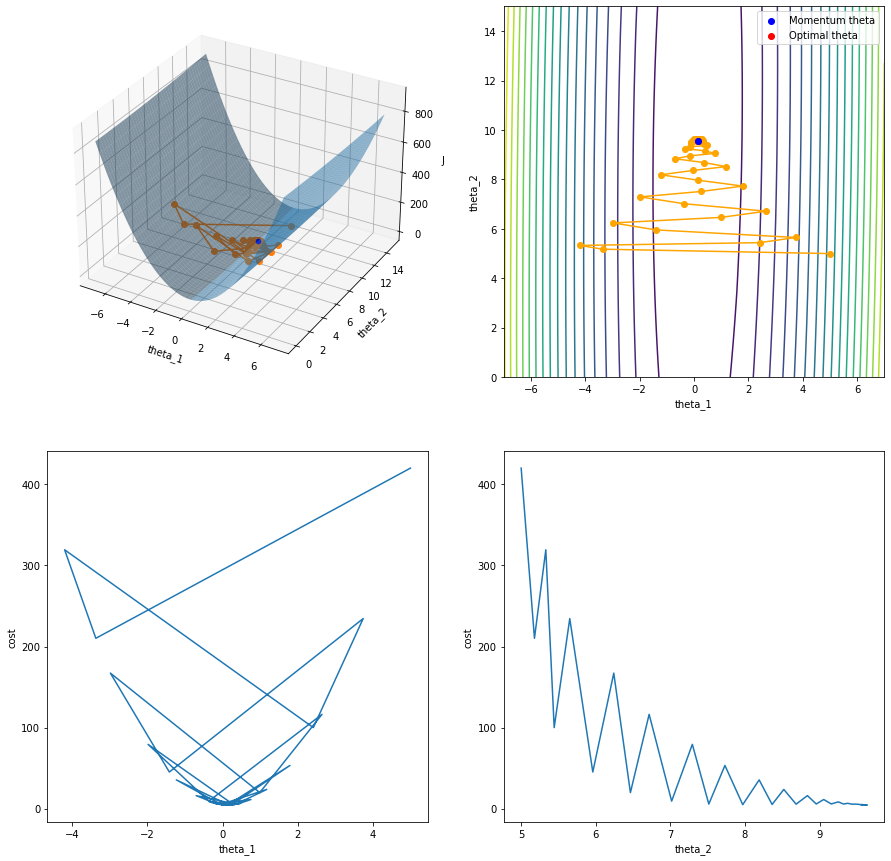

In [190]:
thetas_hist, costs = BatchGradientDescentWithMomentum(x_points, y_points, fit_intercept=False, lr=0.05, beta=0.8, epochs=100)
thetas_hist = np.asarray(thetas_hist).reshape((-1, 2))
print("GD theta_0: ", thetas_hist[-1][0])
print("GD theta_1: ", thetas_hist[-1][1])

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
plot_cost(ax1, ax2, -7, 7, 0, 15, x_points, y_points, thetas_hist, costs, optimal_theta, 'Momentum', ['theta_1', 'theta_2'])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('theta_1')
ax3.set_ylabel('cost')
ax3.plot(thetas_hist[:, 0], costs)


ax4 = fig.add_subplot(224)
ax4.set_xlabel('theta_2')
ax4.set_ylabel('cost')
ax4.plot(thetas_hist[:, 1], costs)
plt.show()